          Quantidade         Valor Nº DE OPERAÇÕES  VALOR TOTAL DAS OPERAÇÕES
1994-10  59373124156  1.299431e+11               0                        0.0
1994-11  63679634183  1.381383e+11               0                        0.0
1994-12  79306603111  2.014113e+11               0                        0.0
1995-01  80327424630  1.913786e+11               0                        0.0
1995-02  72321191366  1.529232e+11               0                        0.0


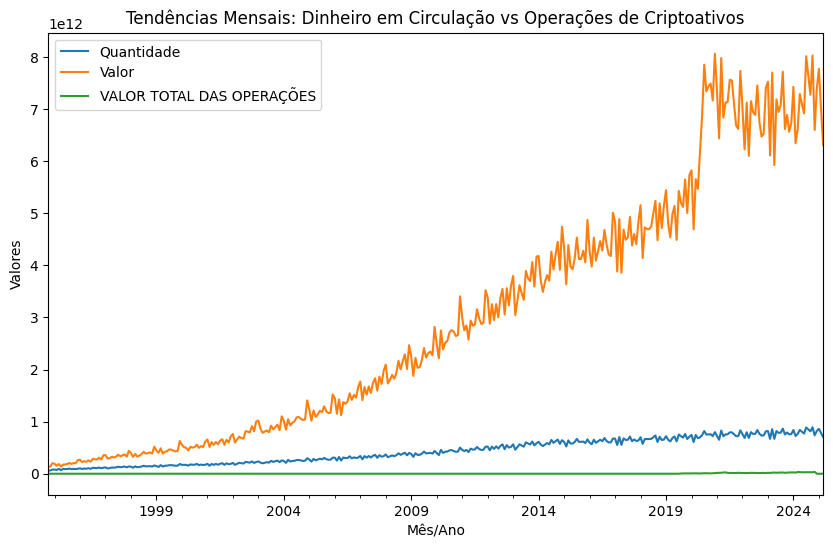

In [ ]:
#LUKE MARQUES MAGALHÃES 10401112

import pandas as pd
import matplotlib.pyplot as plt

dinheiro_circulacao = pd.read_csv('/content/dinheiro.csv', delimiter=';')
criptoativos = pd.read_csv('/content/criptoativos-consolidado.csv', delimiter=';')

dinheiro_circulacao['Valor'] = dinheiro_circulacao['Valor'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

dinheiro_circulacao['Data'] = pd.to_datetime(dinheiro_circulacao['Data'], format='%d/%m/%Y')
dinheiro_circulacao['Mês/Ano'] = dinheiro_circulacao['Data'].dt.to_period('M')

def converter_mes_ano(data_texto):
    meses = {
        "janeiro": "01", "fevereiro": "02", "março": "03", "abril": "04", "maio": "05",
        "junho": "06", "julho": "07", "agosto": "08", "setembro": "09", "outubro": "10",
        "novembro": "11", "dezembro": "12"
    }
    partes = data_texto.lower().split(" de ")
    mes = meses.get(partes[0])
    ano = partes[1]
    return f"{ano}-{mes}-01"

criptoativos['VALOR TOTAL DAS OPERAÇÕES'] = criptoativos['VALOR TOTAL DAS OPERAÇÕES'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

criptoativos['MÊS/ANO'] = criptoativos['MÊS/ANO'].apply(converter_mes_ano)
criptoativos['MÊS/ANO'] = pd.to_datetime(criptoativos['MÊS/ANO'], format='%Y-%m-%d').dt.to_period('M')

# Agrupando os dados por Mês/Ano
dinheiro_circulacao_agrupado = dinheiro_circulacao.groupby('Mês/Ano')[['Quantidade', 'Valor']].sum()
criptoativos_agrupado = criptoativos.groupby('MÊS/ANO')[['Nº DE OPERAÇÕES', 'VALOR TOTAL DAS OPERAÇÕES']].sum()

# Unificando os dados e tratando valores ausentes
dados_unificados = pd.concat([dinheiro_circulacao_agrupado, criptoativos_agrupado], axis=1).fillna(0)

# Exibindo os primeiros dados unificados
print(dados_unificados.head())

# Visualizando as tendências ao longo do tempo
dados_unificados.plot(figsize=(10, 6))
plt.title("Tendências Mensais: Dinheiro em Circulação vs Operações de Criptoativos")
plt.xlabel("Mês/Ano")
plt.ylabel("Valores")
plt.legend()
plt.show()
